Prediction with 1 year of data

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:

##Importing libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

### Read Data with Memory optimization

In [0]:
def reduce_mem_usage():

    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    
    df=pd.read_csv('/content/drive/My Drive/phd/Copy of train.csv',na_values=["NA","?",",",""])
    print("Data Type of columns in the data frame before optimization")
    print(df.dtypes)
    print()

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of the data frame before optimization is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of the data frame after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print()
    
    print("Data type of columns in the data frame after optimization")
    print(df.dtypes)
    print()

    return df

#Optimi
train_data=reduce_mem_usage()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Data Type of columns in the data frame before optimization
date            object
locationId      object
item_id         object
unit_sales     float64
onpromotion     object
dtype: object

Memory usage of the data frame before optimization is 3879.12 MB
Memory usage of the data frame after optimization is: 970.02 MB
Decreased by 75.0%

Data type of columns in the data frame after optimization
date           category
locationId     category
item_id        category
unit_sales      float32
onpromotion    category
dtype: object



In [0]:
train_data.to_pickle("train_data_optimize.pkl")

In [0]:
test = pd.read_csv('/content/drive/My Drive/phd/test.csv',na_values=["NA","?",",",""])
test.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482295 entries, 0 to 1482294
Data columns (total 5 columns):
id             1482295 non-null int64
date           1482295 non-null object
locationId     1482295 non-null object
item_id        1482295 non-null object
onpromotion    1482295 non-null bool
dtypes: bool(1), int64(1), object(3)
memory usage: 46.6+ MB


In [0]:
train_data = pd.read_pickle('/content/train_data2.pkl')

In [0]:
train_data.head()

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN
3,2015-01-01,location_25,item_108079,1.0,NaN
4,2015-01-01,location_25,item_108701,1.0,NaN


In [0]:
train_data['onpromotion'].fillna(train_data['onpromotion'].mode()[0], inplace=True)



In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101688779 entries, 0 to 101688778
Data columns (total 5 columns):
date           category
locationId     category
item_id        category
unit_sales     float32
onpromotion    category
dtypes: category(4), float32(1)
memory usage: 970.0 MB


Outliers

In [0]:
median = train_data['unit_sales'].median()
std = train_data['unit_sales'].std()
outliers = (train_data['unit_sales'] - median).abs() > 3*std


In [0]:
train_data.loc[outliers,'unit_sales'] = np.nan

In [0]:
train_data.isnull().sum()

date                0
locationId          0
item_id             0
unit_sales     981679
onpromotion         0
dtype: int64

In [0]:
train_data['unit_sales'].fillna(median, inplace=True)

In [0]:
train_data.isnull().sum()

date                0
locationId          0
item_id             0
unit_sales          0
onpromotion         0
class               0
category_of_item    0
perishable          0
city                0
state               0
cluster             0
type                0
transactions        0
dtype: int64

In [0]:
train_data['locationId'] = train_data.locationId.apply(lambda name: name.split('_')[1].strip())

In [0]:
train_data['item_id'] = train_data.item_id.apply(lambda name: name.split('_')[1].strip())

In [0]:
train_data.head()

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,25,103665,7.0,False
1,2015-01-01,25,105574,1.0,False
2,2015-01-01,25,105575,2.0,False
3,2015-01-01,25,108079,1.0,False
4,2015-01-01,25,108701,1.0,False


convert date

In [0]:
train_data['date'] = train_data['date'].astype("object")

In [0]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101688779 entries, 0 to 101688778
Data columns (total 5 columns):
date           datetime64[ns]
locationId     category
item_id        category
unit_sales     float32
onpromotion    category
dtypes: category(3), datetime64[ns](1), float32(1)
memory usage: 1.5 GB


### Model Building 

In [0]:
train_data.to_pickle("train_data2.pkl")

Due to computational complexity we will take one year latest data

In [0]:
train_2018 = train_data[train_data["date"].dt.year == 2018]

Creating a new feature "No_of_days" which helps in the analysis and accounts for the time aspect

In [0]:
current_date='2018-01-01'
current_date=pd.to_datetime(current_date)
train_2018['No_of_days']=train_2018['date']-current_date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
train_2018['No_of_days'] = train_2018['No_of_days'].dt.days.astype('int16')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
del train_2018["date"]

In [0]:
import gc
gc.collect()

1144

In [0]:
train_2018_data=train_2018.iloc[:24660909,:]

In [0]:
val_2018_data=train_2018.iloc[24660909:,:]

In [0]:
#Performing train test split on the data
X_train, y_train = train_2018_data.loc[:,train_2018_data.columns!='unit_sales'], train_2018_data.loc[:,'unit_sales']

X_val, y_val = val_2018_data.loc[:,val_2018_data.columns!='unit_sales'], val_2018_data.loc[:,'unit_sales']

Linear Regression

In [0]:
train_2018.head()

,date,locationId,item_id,unit_sales,onpromotion,No_of_days
66458908,2018-01-01,25,105574,12.0,False,0 days
66458909,2018-01-01,25,105575,9.0,False,0 days
66458910,2018-01-01,25,105857,3.0,False,0 days
66458911,2018-01-01,25,108634,3.0,False,0 days
66458912,2018-01-01,25,108701,2.0,True,0 days


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [0]:
X_train['onpromotion']= le.fit_transform(X_train['onpromotion'])
#X_train['class']= le.fit_transform(X_train['class']) 
X_train['locationId']= le.fit_transform(X_train['locationId']) 
X_train['item_id']= le.fit_transform(X_train['item_id'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [0]:
X_train['onpromotion'] = X_train['onpromotion'].astype("int8")
X_train['locationId'] = X_train['locationId'].astype("int8")
X_train['item_id'] = X_train['item_id'].astype("int16")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
import statsmodels.api as sm

In [0]:
# Note the difference in argument order
linear_model = sm.OLS(y_train, X_train).fit()
## make the predictions by the model



In [0]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             unit_sales   R-squared (uncentered):                   0.092
Model:                            OLS   Adj. R-squared (uncentered):              0.092
Method:                 Least Squares   F-statistic:                          6.224e+05
Date:                Mon, 02 Mar 2020   Prob (F-statistic):                        0.00
Time:                        05:54:30   Log-Likelihood:                     -1.1448e+08
No. Observations:            24660909   AIC:                                  2.290e+08
Df Residuals:                24660905   BIC:                                  2.290e+08
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
locationId      0.1578      0.000    579.794      0.000       0.157       0.158
item_id         0.0007   3.89e-06    179.772      0.000       0.001       0.001
onpromotion     4.7724      0.018    258.551      0.000       4.736       4.809
No_of_days      0.0104   5.77e-05    180.404      0.000       0.010       0.011
==================================================================================
Omnibus:                149308973.260   Durbin-Watson:                       1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   308868849202282944.000
Skew:                         436.641   Prob(JB):                             0.00
Kurtosis:                  548264.291   Cond. No.                         7.95e+03
==================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
predictions_train = linear_model.predict(X_train) 

In [0]:
predictions_train

38594264     7.4073
38594265     7.4091
38594266    7.41197
38594267    7.41203
38594268    7.41211
             ...   
82760419    7.39308
82760420    7.39363
82760421    7.39666
82760422    12.4421
82760423    7.39937
Length: 44166160, dtype: object

In [0]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
mean_absolute_percentage_error(y_train, predictions_train)

210.13319597110072

In [0]:
prediction_val=linear_model.predict(X_val.astype(float)) 

In [0]:
mean_absolute_percentage_error(y_val, prediction_val)

285.87100521006755

Using light GBM because it proved to be fast in comparing with other models

In [0]:
train_2018.columns

Index(['date', 'locationId', 'item_id', 'unit_sales', 'onpromotion',
       'No_of_days'],
      dtype='object')

In [0]:
train_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35229871 entries, 66458908 to 101688778
Data columns (total 6 columns):
date           datetime64[ns]
locationId     category
item_id        category
unit_sales     float32
onpromotion    category
No_of_days     int16
dtypes: category(3), datetime64[ns](1), float32(1), int16(1)
memory usage: 873.7 MB


In [0]:
train_2018_3=train_2018[(train_2018["date"]>='2018-01-01') & (train_2018["date"]<='2018-03-31')]

In [0]:
del train_2018_3["date"]

In [0]:
train_2018_3.shape

(5754440, 5)

In [0]:
train_2018_3.tail()

,date,locationId,item_id,unit_sales,onpromotion,No_of_days
74962593,2018-03-31,48,2256,2.0,0,89
74962594,2018-03-31,48,2257,6.0,0,89
74962595,2018-03-31,48,2259,6.0,0,89
74962596,2018-03-31,48,2260,1.0,0,89
74962597,2018-03-31,48,2261,1.0,1,89


categorical to numerical  LE

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [0]:
train_2018_3['onpromotion']= le.fit_transform(train_2018_3['onpromotion'])
#train_2018_3['class']= le.fit_transform(train_2018_3['class']) 
train_2018_3['locationId']= le.fit_transform(train_2018_3['locationId']) 
train_2018_3['item_id']= le.fit_transform(train_2018_3['item_id'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [0]:
train_2018_3[["locationId","item_id","onpromotion"]]=train_2018_3[["locationId","item_id","onpromotion"]].astype("category")

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Creating the local validation set and performing the necessary operations on the validation set as well

In [0]:
train_2018_3_val=train_2018_3[train_2018_3["No_of_days"]>60]

In [0]:
train_2018_3=train_2018_3[train_2018_3["No_of_days"]<=60]

In [0]:
train_2018_3['locationId']= le.fit_transform(train_2018_3['locationId']) 
train_2018_3['item_id']= le.fit_transform(train_2018_3['item_id'])
train_2018_3['onpromotion']= le.fit_transform(train_2018_3['onpromotion'])
#train_2018_3['class']= le.fit_transform(train_2018_3['class'])

train_2018_3_val['item_id']= le.fit_transform(train_2018_3_val['item_id'])
train_2018_3_val['locationId']= le.fit_transform(train_2018_3_val['locationId'])
#train_2018_3_val['class']= le.fit_transform(train_2018_3_val['class'])
train_2018_3_val['onpromotion']= le.fit_transform(train_2018_3_val['onpromotion'])


In [0]:
train_2018_3[["locationId","item_id","onpromotion"]]=train_2018_3[["locationId","item_id","onpromotion"]].astype("category")

In [0]:
train_2018_3_val[["locationId","item_id","onpromotion"]]=train_2018_3_val[["locationId","item_id","onpromotion"]].astype("category")

In [0]:
train_2018_3_val.dtypes

date           datetime64[ns]
locationId           category
item_id              category
unit_sales            float32
onpromotion          category
No_of_days              int16
dtype: object

Assigning the labels and features 

In [0]:
X_val = train_2018_3_val.drop('unit_sales',axis=1)
y_val=train_2018_3_val['unit_sales']

In [0]:
X = train_2018_3.drop('unit_sales',axis=1)
y=train_2018_3['unit_sales']

Choosing the right hyperparameters(These hyperparameters were selected after trial and error)

In [0]:
params = {
    'num_leaves': 300,
    'objective': 'regression',
    'min_data_in_leaf': 400,
    'learning_rate': 0.01,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
    'metric': 'mape',
    'num_threads': 16
}

MAX_ROUNDS = 2000

Selecting the lightgbm model as it gave the best results compared to the other models and it was much faster

In [0]:
import lightgbm as lgb

Creating the train and validation sets 

In [0]:
dtrain = lgb.Dataset(X, label=y,)

In [0]:
dval=lgb.Dataset(X_val,label=y_val)

In [0]:
bst = lgb.train(params, dtrain, num_boost_round=MAX_ROUNDS,valid_sets=[dtrain,dval], early_stopping_rounds=400, verbose_eval=50)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 400 rounds.
[50]	training's mape: 1.7068	valid_1's mape: 1.94575
[100]	training's mape: 1.47358	valid_1's mape: 1.85758
[150]	training's mape: 1.33919	valid_1's mape: 1.81932
[200]	training's mape: 1.24111	valid_1's mape: 1.80238
[250]	training's mape: 1.16791	valid_1's mape: 1.79356
[300]	training's mape: 1.1103	valid_1's mape: 1.78345
[350]	training's mape: 1.06943	valid_1's mape: 1.78302
[400]	training's mape: 1.03434	valid_1's mape: 1.78011
[450]	training's mape: 1.01173	valid_1's mape: 1.78296
[500]	training's mape: 0.993848	valid_1's mape: 1.78479
[550]	training's mape: 0.979851	valid_1's mape: 1.78531
[600]	training's mape: 0.965758	valid_1's mape: 1.78335
[650]	training's mape: 0.955017	valid_1's mape: 1.78248
[700]	training's mape: 0.946079	valid_1's mape: 1.78109
[750]	training's mape: 0.937703	valid_1's mape: 1.77968
[800]	training's mape: 0.930772	valid_1's mape: 1.77905
Early stopping, best iteration is:
[408]	training's m

Feature importance-feature selection was done at this step 

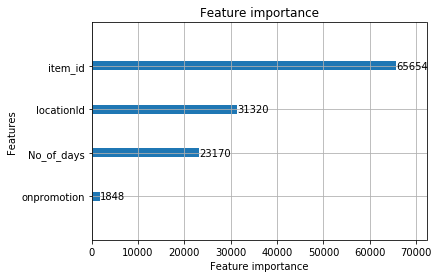

In [0]:
sx= lgb.plot_importance(bst)

Performing the necessary pre processing operations on the test set as well and finally making the predictions 

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


In [0]:
test['locationId'] = test.locationId.apply(lambda name: name.split('_')[1].strip())

In [0]:
test['item_id'] = test.item_id.apply(lambda name: name.split('_')[1].strip())

In [0]:
test["date"] =test["date"].astype('object')
test["date"] =  pd.to_datetime(test["date"])
test=test.sort_values(by='id')
test.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,25,99197,False
1,1,2019-01-01,25,103665,False
2,2,2019-01-01,25,105574,False
3,3,2019-01-01,25,105857,False
4,4,2019-01-01,25,106716,False


In [0]:
current='2018-01-01'
current=pd.to_datetime(current)
test['No_of_days']=test['date']-current

In [0]:
test['No_of_days'] = test['No_of_days'].dt.days.astype('int16')

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion,No_of_days
0,0,2019-01-01,25,99197,False,365
1,1,2019-01-01,25,103665,False,365
2,2,2019-01-01,25,105574,False,365
3,3,2019-01-01,25,105857,False,365
4,4,2019-01-01,25,106716,False,365


In [0]:
test.dtypes

id                      int64
date           datetime64[ns]
locationId             object
item_id                object
onpromotion              bool
No_of_days              int16
dtype: object

In [0]:
test.drop('date',axis=1,inplace=True)

In [0]:
test.head()

,id,locationId,item_id,onpromotion,No_of_days
0,0,25,99197,False,365
1,1,25,103665,False,365
2,2,25,105574,False,365
3,3,25,105857,False,365
4,4,25,106716,False,365


In [0]:
test['locationId']= le.fit_transform(test['locationId']) 
test['item_id']= le.fit_transform(test['item_id'])
test['onpromotion']= le.fit_transform(test['onpromotion'])

In [0]:
test[["locationId","item_id","onpromotion"]]=test[["locationId","item_id","onpromotion"]].astype("category")

In [0]:
test.head()

,id,locationId,item_id,onpromotion,No_of_days
0,0,17,3818,0,365
1,1,17,45,0,365
2,2,17,119,0,365
3,3,17,132,0,365
4,4,17,143,0,365


In [0]:
test_data=test

In [0]:
test.drop('id',axis=1,inplace=True)

In [0]:
y_pred=bst.predict(test)

In [0]:
y_pred=pd.Series(y_pred)

In [0]:
y_pred=y_pred.to_frame()

In [0]:
y_pred.shape

(1482295, 1)

In [0]:
test_data=pd.read_csv('/content/drive/My Drive/phd/test.csv',na_values=["NA","?",",",""])

In [0]:
test_data['unit_sales']=y_pred

In [0]:
test_data.columns

Index(['id', 'date', 'locationId', 'item_id', 'onpromotion', 'unit_sales'], dtype='object')

In [0]:
test_data.drop(columns= ['date', 'locationId', 'item_id', 'onpromotion'], axis=1, inplace=True)

In [0]:
test_data.head()

,id,unit_sales
0,0,3.009236
1,1,3.045994
2,2,8.297019
3,3,3.482623
4,4,3.978136


In [0]:
test_data.shape

(1482295, 2)

In [0]:
test_data.to_csv(r'pred_lgm_correct.csv',index=False)

NN with categorical embedding

In [0]:
train_2018=train_data[train_data['date'] >='2018-01-01']

Creating a new feature "No_of_days" which helps in the analysis and accounts for the time aspect

In [0]:
current_date='2018-01-01'
current_date=pd.to_datetime(current_date)
train_2018['No_of_days']=train_2018['date']-current_date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
train_2018['No_of_days'] = train_2018['No_of_days'].dt.days.astype('int16')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
del train_2018["date"]

In [0]:
import gc
gc.collect()

0

In [0]:
train_2018.shape

(35229871, 5)

In [0]:
train_2018.head()

,locationId,item_id,unit_sales,onpromotion,No_of_days
66458908,25,105574,12.0,False,0 days
66458909,25,105575,9.0,False,0 days
66458910,25,105857,3.0,False,0 days
66458911,25,108634,3.0,False,0 days
66458912,25,108701,2.0,True,0 days


In [0]:
train_2018_data=train_2018.iloc[:24660909,:]

In [0]:
val_2018_data=train_2018.iloc[24660909:,:]

In [0]:
#Performing train test split on the data
X_train, y_train = train_2018_data.loc[:,train_2018_data.columns!='unit_sales'], train_2018_data.loc[:,'unit_sales']

X_val, y_val = val_2018_data.loc[:,val_2018_data.columns!='unit_sales'], val_2018_data.loc[:,'unit_sales']

In [0]:
import pandas as pd
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Embedding, concatenate, Flatten, Input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [0]:
location_input = Input(shape=(1, ), name="location")
location_embed = Embedding(input_dim=len(X_train['locationId'].unique()), output_dim=10,)(location_input)

In [0]:
item_input = Input(shape=(1, ), name="item")
item_embed = Embedding(input_dim=len(X_train['item_id'].unique()), output_dim=50,)(item_input)

In [0]:
onpromotion_input = Input(shape=(1, ), name="onpromotion")
onpromotion_embed = Embedding(input_dim=len(X_train['onpromotion'].unique()), output_dim=2,)(onpromotion_input)

In [0]:
merge_cat_emb = concatenate([location_embed, item_embed, onpromotion_embed])
merge_cat_emb_flat = Flatten()(merge_cat_emb)

In [0]:
from sklearn import preprocessing

In [0]:
standardized_X = preprocessing.scale(X_train['No_of_days'])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [0]:
standardized_X.shape

(24660909,)

In [0]:
num_input = Input(shape=(1, ))

merge_two = concatenate([merge_cat_emb_flat, num_input])

merged_layer = Dense(8, activation= 'relu')(merge_cat_emb_flat)
output_layer = Dense(1,activation='linear')(merged_layer)

model = Model(inputs=[location_input, item_input, onpromotion_input, num_input], outputs=output_layer)

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
location (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
onpromotion (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 10)        530         location[0][0]                   
____________________________________________________________________________________________

In [0]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [0]:
model.fit([X_train['locationId'],X_train['item_id'],X_train['onpromotion'],standardized_X], 
          y=y_train, 
          epochs=1, verbose=2,batch_size=32)




Epoch 1/1





 - 2321s - loss: 4.8740 - mean_absolute_error: 4.8740


In [0]:
p = model.predict([X_train['locationId'],X_train['item_id'],X_train['onpromotion'],standardized_X])     #, scaled_num_ind_attr_test
p[:5]


array([[2.8116007],
       [2.8116007],
       [2.8116007],
       [2.8116007],
       [4.889616 ]], dtype=float32)

In [0]:
p.shape

(24660909, 1)

In [0]:
y_train.shape

(24660909,)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, p, squared=False)

25.246239

In [0]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10568962 entries, 91119817 to 101688778
Data columns (total 5 columns):
locationId     category
item_id        category
unit_sales     float32
onpromotion    category
No_of_days     int16
dtypes: category(3), float32(1), int16(1)
memory usage: 181.6 MB


In [0]:
standardized_y = preprocessing.scale(X_val['No_of_days'])

In [0]:
model.evaluate([X_val['locationId'],X_val['item_id'],X_val['onpromotion'],standardized_y], y_val)   #, scaled_num_ind_attr_test

10568962/10568962 [==============================] - 389s 37us/step


[6.29669998287406, 6.29669998287406]

In [0]:
p_val = model.predict([X_val['locationId'],X_val['item_id'],X_val['onpromotion'],standardized_y])     #, scaled_num_ind_attr_test


In [0]:
mean_squared_error(y_val, p_val, squared=False)

35.90606

Prediction on test Data

In [0]:
test = pd.read_csv('/content/drive/My Drive/phd/test.csv',na_values=["NA","?",",",""])
test.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


In [0]:
test.shape

(1482295, 5)

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482295 entries, 0 to 1482294
Data columns (total 5 columns):
id             1482295 non-null int64
locationId     1482295 non-null category
item_id        1482295 non-null category
onpromotion    1482295 non-null category
No_of_days     1482295 non-null int16
dtypes: category(3), int16(1), int64(1)
memory usage: 20.0 MB


In [0]:
test['locationId'] = test.locationId.apply(lambda name: name.split('_')[1].strip())

In [0]:
test['item_id'] = test.item_id.apply(lambda name: name.split('_')[1].strip())

In [0]:
test.head()

,id,date,locationId,item_id,onpromotion
0,0,2019-01-01,25,99197,False
1,1,2019-01-01,25,103665,False
2,2,2019-01-01,25,105574,False
3,3,2019-01-01,25,105857,False
4,4,2019-01-01,25,106716,False


In [0]:
test['date']=pd.to_datetime(test['date'],format='%Y-%m-%d')

In [0]:
current='2018-01-01'
current=pd.to_datetime(current)
test['No_of_days']=test['date']-current

In [0]:
del test["date"]

In [0]:
test['locationId'] = test['locationId'].astype("category")

In [0]:
test['item_id'] = test['item_id'].astype("category")
test['onpromotion'] = test['onpromotion'].astype("category")

In [0]:
test['No_of_days'] = test['No_of_days'].dt.days.astype('int16')

In [0]:
standardized_test = preprocessing.scale(test['No_of_days'])

In [0]:
p_test= model.predict([test['locationId'],test['item_id'],test['onpromotion'],standardized_test])     #, scaled_num_ind_attr_test


In [0]:
p_test.shape

(1482295, 1)

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482295 entries, 0 to 1482294
Data columns (total 2 columns):
id            1482295 non-null int64
unit_sales    1482295 non-null float32
dtypes: float32(1), int64(1)
memory usage: 17.0 MB


In [0]:
test['unit_sales']=p_test

In [0]:
test.drop(columns= ['locationId', 'item_id', 'onpromotion','No_of_days'], axis=1, inplace=True)

In [0]:
test.to_csv(r'pred_nn_correct.csv',index=False)

In [0]:
test.shape

(1482295, 2)

In [0]:
test.tail()

,id,unit_sales
1482290,1482290,2.986567
1482291,1482291,2.986567
1482292,1482292,2.986567
1482293,1482293,2.986567
1482294,1482294,2.986567
